In [26]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open("data.pickle", "rb") as input_file:
    data = pickle.load(input_file)

In [7]:
def plot_counts(counts_arr):
    word_arr_encoded = []
    word_arr_numbers = []
    for k, v in counts_arr:
        word_arr_encoded.append(k.encode('utf-8').decode('utf-8'))
        word_arr_numbers.append(v)
    plt.figure(figsize=(16, 6))
    sns.barplot(word_arr_encoded,word_arr_numbers)

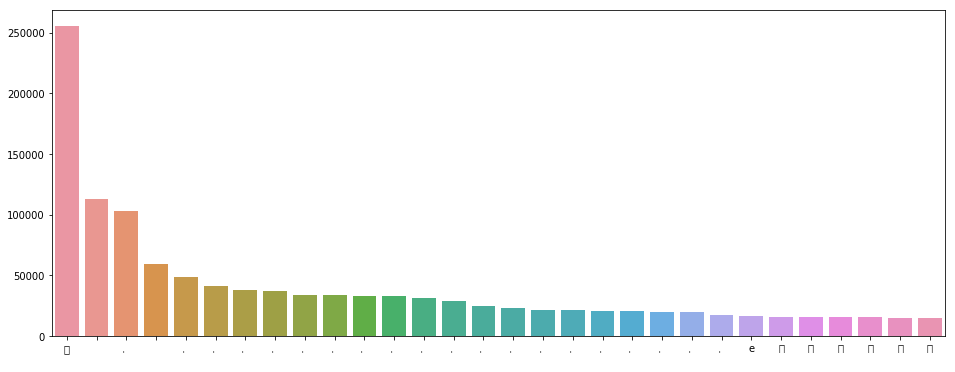

In [8]:
plot_counts(data['zh'][0:30])

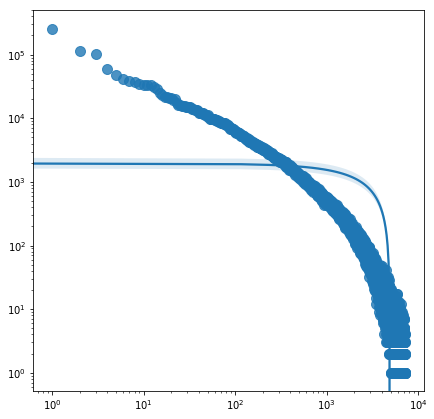

In [28]:
loglog(data['zh'])

In [27]:
def loglog(counts):
    f, ax = plt.subplots(figsize=(7, 7))
    rank = np.array([i for i in range(1,len(counts)+1)])
    word_arr_numbers = []
    for k, v in counts:
        word_arr_numbers.append(int(v))
    word_arr_numbers = np.array(word_arr_numbers)
    ax.set(xscale="log", yscale="log")
    sns.regplot(rank, word_arr_numbers, data, ax=ax, scatter_kws={"s": 100})